In [1]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown



# Python plotting tutorial

This notebook is to be used in conjunction with the [Plotting with Python in the [WL] labs tutorial](https://vickyscowcroft.github.io/teaching_dev/00_schedule.html]). It covers the sections from [reading in data](https://vickyscowcroft.github.io/teaching_dev/03_reading_data.html) onwards.

Skeleton code is provided for you to edit and work with for the exercises in the tutorial.

## Reading in data with `pandas`

## What is pandas?
Unfortunately, this does not mean finding a panda to read our excel files.

Pandas is the **Python Data Analysis Library**. It can read pretty much anything you throw at it. If you've been putting your lab data into an excel spreadsheet, pandas can read it in so you can analyse and plot it. You can find out more about what you can do with pandas [here](https://pandas.pydata.org/,"pandas").

## Reading data from an Excel file
Our first step is to read in our excel spreadsheet to a `pandas dataframe`. Pandas has different functions for different file types. For excel, we need `pd.read_excel`. Our dataframe will be called `data`, but it's best to use a more descriptive name for your variables.

In [2]:
data = pd.read_excel('../data/BoltData.xlsx') 
## Change this path if you've saved the data file somewhere else, e.g. "Downloads/BoltData.xlsx"

It's easy to look at what's in our dataframe. Just type the name of it and your dataframe is printed to the screen.

In [3]:
data

,distance/m,Distnace uncertinty / m,time/s,Time measurment uncertinty / s
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


## Tidying up our data
Right now our data dataframe looks a bit of a mess. There's loads of missing or NaN (not a number) values, and our columns don't have very sensible names. We can re-read the data, specifying what we want to keep and give better names for our columns.


## Column names
`pandas` will let you use pretty much anything for a column name. However, some things make your dataframe much easier to work with:
* Use descriptive names
* **Don't** include spaces in column names - use underscores \_ instead
* Column names can't begin with a number

In [4]:
data = pd.read_excel('../data/BoltData.xlsx', 
                        names=('distance', 'err_distance', 'time', 'err_time'), 
                        usecols=(0,1,2,3), 
                        nrows=11)

In [5]:
data

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


# Exercise: Tidying your data

In the example above, I missed out the units on my column names. Not particularly helpful!

Change the code to give the columns sensible names that include the units.

In [6]:
## Enter your code here
## ...
## ...



# Making a plot with `matplotlib`

First we will make a quick plot to see what our data looks like. 

### Important: 
You will need to change the data.distance and data.time column names in the cell below to be the same as you set them in the exercise above.

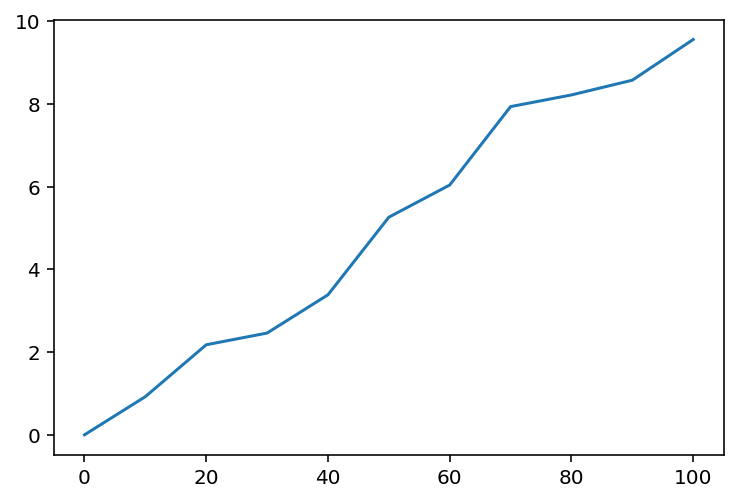

In [7]:
plt.plot(data.distance, data.time)

## What makes a good scientific plot?

Any plot you make should be clear and informative. There are several things that you **always** need on a plot of your results:
* Error bars
* Axis labels
* Units

The code in the next cell gives us exactly that! See the [quick plot](https://vickyscowcroft.github.io/teaching_dev/04_quick_plot.html) page for details of what everything means. Again, remember you need to change the column names if you renamed them earlier.

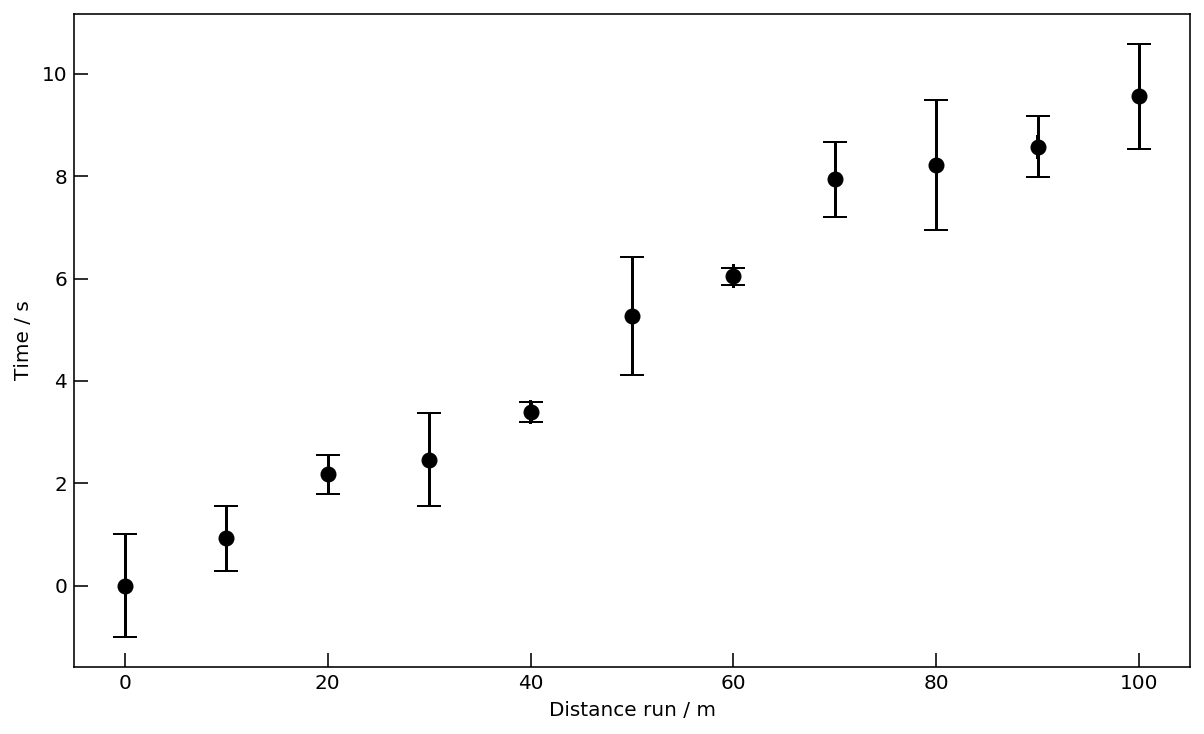

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,
             markerfacecolor = 'black',
             color='black',          
             linestyle='none',       
             capsize=6,              
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

ax.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
               )
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
                                        # You may have to play with the aspect ration aobe and this to get a nice 
                                        # looking figure in your report.


plt.show()

## Exercise: Customise the plot
The plot above is informative, but it's not the prettiest.

Copy the code in the cell above to the empty cell below. Edit the parameters to change the following:

* Change the colour of the points
* Change the point (`marker`) shape and size

Information about how to change the colour and shape of the markers can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

In [9]:
## Enter your code here
## ...
## ...



## Saving the plot to a file

In order to use your plot in your lab report, you need to save it to a file using `savefig`. You just need to give `savefig` the output file name and the resolution you want.

In [10]:
fig.savefig('Basic.png', dpi=300) 

# Adding a best fit line


The final thing to do is to add a line of best fit to our plot. We can get a least-squares fit to our data using `curve_fit`.

First we set up the function that we want to fit to our data:
```python 
def line(x, slope, intercept):          
    return slope*x + intercept
```
Here we've defined our `line` function to fit an equation of the form
$$ y = m x + c $$
to the data, where $m$ is the slope and $c$ is the intercept.
Next we pass this function and the x and y data to `curve_fit`:
```python
popt, pcov = curve_fit(line,data.distance,data.time)
```
This will find the best fit line to our `distance` and `time` data and send the parameters to the `popt` and `pcov` variables.

See the [adding a best fit line](https://vickyscowcroft.github.io/teaching_dev/05_line_fit.html) for further details about how all this works.

In [11]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,data.distance,data.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

We can print the parameters and their uncertainties to the screen using `print`

In [12]:
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 0.100 +- 0.005
Intercept: -0.048 +- 0.270


## Final plot

Now we can make a nice plot that includes the best fit line, its parameters, and a legend. See the [adding a best fit line](https://vickyscowcroft.github.io/teaching_dev/05_line_fit.html) section for full details.

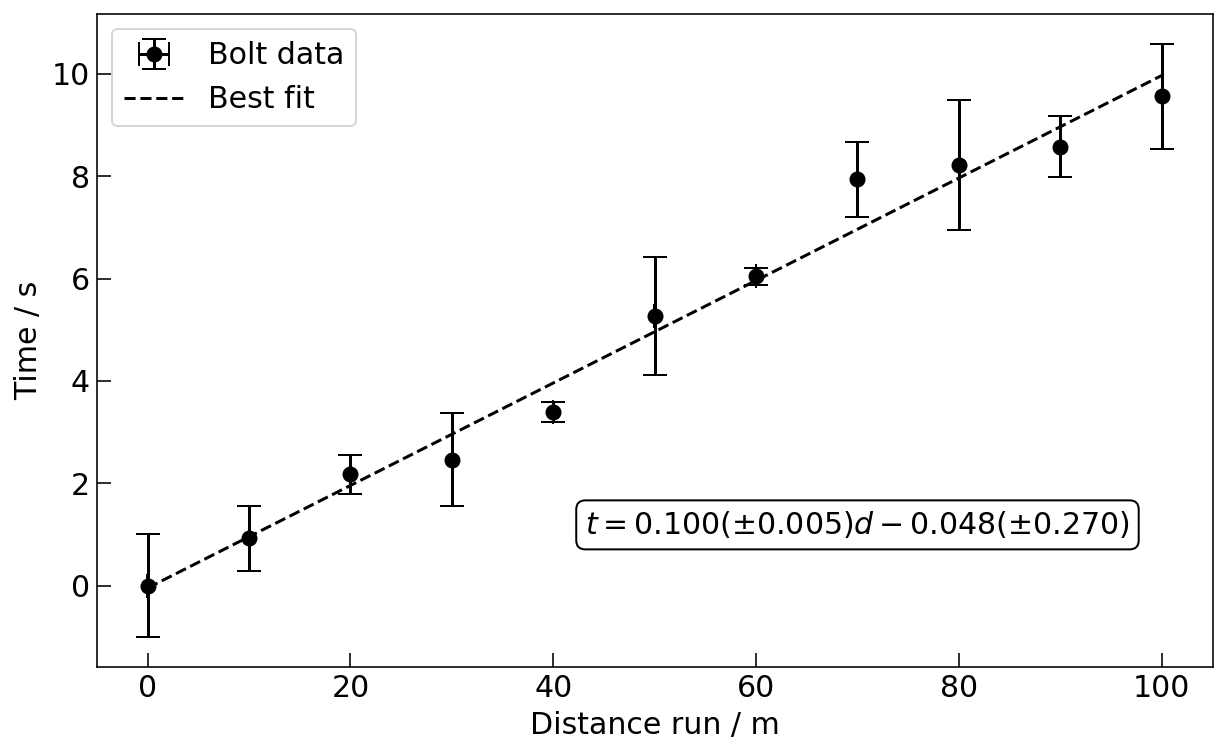

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Bolt data"
             )

ax.set_xlabel('Distance run / m')
ax.set_ylabel('Time / s')

ax.tick_params(direction='in',      
                length=7,           
               )
ax.plot(data.distance, data.distance*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
annotation ='$t = {0:.3f} ( \pm {1:.3f})d {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

## Exercise: Make your final plot

Copy and paste the code to the empty cell below. Edit it so that the best fit line is a different colour and the legend is in a different place. Information about how to change the legend can be found [here]

In [14]:
## Enter your code here
## ...
## ...


## Saving the plot to a file

The last thing we need to do is save our plot. **Be careful!** You won't get a warning if you're going to overwrite an existing file, so make sure to give your figure a new name. 

In [15]:
fig.savefig('fancy.png', dpi=300) 